In [3]:
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('/home/ichigo/Desktop/Skit_learn/Data _set/data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
#seperating independent and dependent variables
x = df.drop(['Survived'], axis=1)
y = df['Survived']
x.shape, y.shape

((891, 24), (891,))

In [6]:
#importing min max scaler
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(x)

In [7]:
x = pd.DataFrame(x_scaled,columns = x.columns)
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

In [9]:
#importing knn classifieer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


In [10]:
#Creating instances of knn classifier
clf = KNN(n_neighbors=10)
clf.fit(train_x,train_y)


KNeighborsClassifier(n_neighbors=10)

In [11]:
#Predicting the intances with test data
test_predict = clf.predict(test_x)
k = f1_score(test_predict,test_y)
print(f'F1 score  {k}')

F1 score  0.7


In [12]:
def knieghbours(k):

    Test_error = []
    for i in k:
        clf = KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        #append the Error in list
        tmp = clf.predict(test_x)
        score_error = f1_score(tmp,test_y)
        error = 1-score_error
        Test_error.append(error)
    return Test_error

In [13]:
k = range(1,25,2)
score = knieghbours(k)

Text(0.5, 1.0, 'Elbow Curve for test')

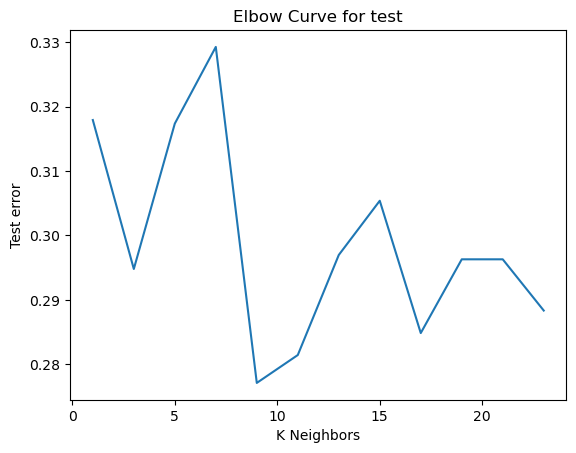

In [14]:
# plotting the Curves
plt.plot(k, score)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')